In [1]:
## Basic imports for worling with paths
import os
import sys

## Custom package modules
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)

from misloc_mispol_package.calc import BEM_simulation_wrapper as bem
from misloc_mispol_package.calc import fitting_misLocalization as fit
from misloc_mispol_package.calc import coupled_dipoles as cp
from misloc_mispol_package.optics import anal_foc_diff_fields as afi
from misloc_mispol_package.optics import diffraction_int as diffi
    
import numpy as np
## For fitting
import scipy.optimize as opt
## For loading matlab files 
import scipy.io as sio
from scipy.constants import physical_constants

## Plotting
import matplotlib.pyplot as plt
import matplotlib as mpl

## Matplotlib settings
## inspired by http://nipunbatra.github.io/2014/08/latexify/
params = {
    'text.latex.preamble': ['\\usepackage{gensymb}'],
    'image.origin': 'lower',
    'image.interpolation': 'nearest',
    'image.cmap': 'magma',
    'axes.grid': False,
    'figure.dpi': 300,  # to adjust notebook inline plot size
    'savefig.dpi': 300,  # to adjust notebook inline plot size
    'axes.labelsize': 12, # fontsize for x and y labels (was 10)
    'axes.titlesize': 14,
    'font.size': 8, # was 10
    'legend.fontsize': 8, # was 10
    'xtick.labelsize': 8,
    'ytick.labelsize': 8,
    'text.usetex': True,
    'figure.figsize': [3.5, 2.625], # 4 x 3
    'font.family': 'serif',
    'figure.max_open_warning':100
}
mpl.rcParams.update(params)

## For colorbar 
from mpl_toolkits.axes_grid1 import make_axes_locatable
## Instructions for adding colorbar to axes 
#     ## Add colorbar
#     divider = make_axes_locatable(axs[ax_idx])
#     cax1 = divider.append_axes("right", size="5%", pad=0.05)
#     fig.colorbar(img1, cax=cax1)

## Useful unit conversion
m_per_nm = fit.m_per_nm

In [2]:
import scipy.constants as con
hbar = con.physical_constants['Planck constant over 2 pi in eV s'][0]
c = con.physical_constants['speed of light in vacuum'][0]*1e2 #cm/m
nm = 1e-7
## DEFINE BACKGROUND FOR FITS
eps_b = 1.778

In [3]:
cp.G(1, np.array([[1, 1, 1]])).shape

dyad.shape = (1, 3, 3)
d.size = 1


(1, 3, 3)

In [4]:
cp.G(1, np.array([[1, 1, 1], [1, 1, 1]])).shape

dyad.shape = (2, 3, 3)
d.size = 2


(2, 3, 3)

In [5]:

cp.G(np.array([1, 2]), np.array([[1, 1, 1]])).shape

dyad.shape = (1, 3, 3)
d.size = 1


(2, 3, 3)

In [6]:
# cp.G(np.array([1, 2]), np.array([[1, 1, 1], [1, 1, 1]])).shape

Seens to be working ok, try the spectrum

In [7]:
cp.sparse_polarizability_tensor(1, 1, np.array([1, 2]), 1, 1,1, 1).shape

(2, 3, 3)

In [79]:
def test_alpha_0_of_omega(w): 
    alpha = cp.sparse_polarizability_tensor(
        1e-20, 2.4/hbar, w, 0.05/hbar, 0, 0, 1)
    return alpha

def test_alpha_1_of_omega(w): 
    alpha = cp.sparse_polarizability_tensor(
        1e-30, 2.5/hbar, w, 0.05/hbar, 0, 0, 1)
    return alpha

test_d = np.array([[10, 0, 0]])*1e-7,

def dipoles_of_omega(w):
    """Returns [p_0, p_1] both of shape ~ (# omegas, 3)"""
    return cp.dipole_moments_per_omega(
        mol_angle=0,
        plas_angle=0,
        d=test_d,
        drive_hbar_w=w*hbar,
        alpha0_diag_of_omega=test_alpha_0_of_omega,
        alpha1_diag_of_omega=test_alpha_1_of_omega,)


In [80]:

test_p0, test_p1 = dipoles_of_omega(np.linspace(1,3, 5))

dyad.shape = (1, 3, 3)
d.size = 1


In [92]:
hbar_ws = np.linspace(2,3, 500)

test_spec = cp.sigma_scat_coupled(
    dipoles_of_omega,
    test_d[0],
    hbar_ws,
    )

dyad.shape = (1, 3, 3)
d.size = 1
p_0, p_1 = (array([[ 1.69825322e-28+9.64916602e-30j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
       [ 1.70596584e-28+9.74711624e-30j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
       [ 1.71375633e-28+9.84654872e-30j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
       ...,
       [-9.30383315e-29+4.33372002e-30j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
       [-9.26933403e-29+4.30446077e-30j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
       [-9.23506665e-29+4.27549382e-30j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j]]), array([[1.51551835e-29+1.55137858e-30j, 0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j],
       [1.52780617e-29+1.57201871e-30j, 0.00000000e+00+0.00000000e+00j,
        0.00000000e+00+0.00000000e+00j],
       [1.54025647

In [93]:
## 
def ret_fit_scat_1(hbarw, eps_inf, hbarw_p, hbargamma, a):
    return cp.sigma_scat_ret_sphere(
        hbarw/hbar, eps_inf, hbarw_p/hbar, hbargamma/hbar, eps_b, a*nm)

In [117]:
def osc_spec_model(
    hw, 
    mass, 
    hw_res, 
    hbargamma_nr,  
    eps_b=1.,
    ):
    
    gamma = hbargamma_nr/hbar

    alpha = cp.sparse_polarizability_tensor(
#         cpc.fluorophore_mass(70000, gamma), 
        mass,
        w_res=hw_res/hbar, 
        w=hw/hbar, 
        gamma_nr=gamma, 
        a=0, 
        eps_inf=0, 
        eps_b=eps_b,
        )
#     print(alpha.shape)
    
    sigma = cp.sigma_prefactor(hw/hbar, eps_b) * (
        np.abs(alpha[:,0,0])**2.
        )
    
    return sigma

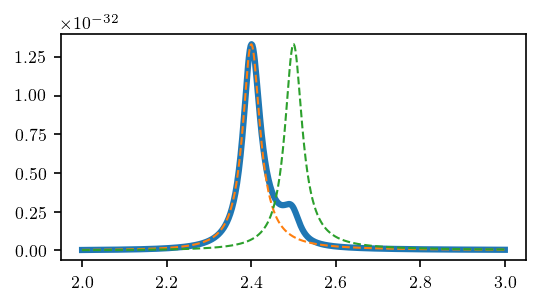

In [122]:
plt.figure(figsize=(4,2), dpi=150)
plt.plot(
    ws, 
    test_spec,#/test_spec.max()
    lw=3
    )

test_spec_1 = osc_spec_model(hbar_ws, 1e-20, 2.4, 0.05)
test_spec_2 = osc_spec_model(hbar_ws, 1e-30, 2.5, 0.05)

test_spec_1 *= test_spec.max() / test_spec_1.max()
test_spec_2 *= test_spec.max() / test_spec_2.max()

plt.plot(hbar_ws, test_spec_1, lw=1, ls='--')
plt.plot(hbar_ws, test_spec_2, lw=1, ls='--')